# Lead Score utilitarios empresas

In [1]:
#referencias:
#https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
#https://www.kaggle.com/tboyle10/methods-for-dealing-with-imbalanced-data
#https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b


#Area de Analytics - Comercial Kaufmann
#creado por Sebastian Alibaud



# CARGA DE PAQUETES

In [2]:
# quitamos alertas porfavor!
import warnings
warnings.filterwarnings('ignore')

In [3]:
# librerias clasicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ploteos
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn.metrics import roc_curve,confusion_matrix,accuracy_score,recall_score
from sklearn.metrics import f1_score,precision_score,roc_auc_score,average_precision_score


#modelos
from sklearn.model_selection import train_test_split
from  sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.svm import SVC
#from sklearn.linear_model import RidgeClassifier,SGDClassifier,LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,average_precision_score
#from sklearn.neighbors import NearestNeighbors
import xgboost as xgb


### Funciones utiles

In [4]:
#funciones para medir

def mediciones(x_train,y_train,x_test,y_test,model):
    a = int(accuracy_score(y_train,model.predict(x_train))*1000)/1000
    b = int(recall_score(y_train,model.predict(x_train))*1000)/1000
    c = int(accuracy_score(y_test,model.predict(x_test))*1000)/1000
    d = int(recall_score(y_test,model.predict(x_test))*1000)/1000
    aa = int(roc_auc_score(y_train,model.predict_proba(x_train)[:,1])*1000)/1000
    cc = int(roc_auc_score(y_test,model.predict_proba(x_test)[:,1])*1000)/1000
    dd = int(f1_score(y_test,model.predict(x_test))*1000)/1000
    ee = int(f1_score(y_train,model.predict(x_train))*1000)/1000
    e = {'Entrenamiento':[a,b,aa,ee],
         'Testeo':[c,d,cc,dd]}
    f = pd.DataFrame(data=e,index=["Accuracy","recall","roc","f1"])
    matrix=confusion_matrix(y_test,model.predict(x_test))
    TP=matrix[1,1]
    TN=matrix[0,0]
    FP=matrix[0,1]
    FN=matrix[1,0]
    ma = {'Prediccion falso':[TN,FN],
         'Prediccion verdadero':[FP,TP]}
    i = pd.DataFrame(data=ma,index=["Actual falsa","Actual verdadera"])
    print("Matriz de confusion:\n",i)
    return f



#print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
#fig= plt.figure(figsize=(6,3))# to plot the graph
#print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
#print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
#print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
#print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal


def mediciones2(x_train,y_train,x_test,y_test,model):
    #a = int(accuracy_score(y_train,model.predict(x_train))*1000)/1000
    #b = int(recall_score(y_train,model.predict(x_train))*1000)/1000
    c = int(accuracy_score(y_test,model.predict(x_test))*1000)/1000
    d = int(recall_score(y_test,model.predict(x_test))*1000)/1000
    #aa = int(roc_auc_score(y_train,model.predict_proba(x_train)[:,1])*1000)/1000
    #cc = int(roc_auc_score(y_test,model.predict_proba(x_test)[:,1])*1000)/1000
    e = {'Testeo':[c,d]}
    f = pd.DataFrame(data=e,index=["Accuracy","recall"])
    return f

def roc_(x_train,y_train,x_test,y_test,model):
    aa = int(roc_auc_score(y_train,model.predict_proba(x_train)[:,1])*1000)/1000
    cc = int(roc_auc_score(y_test,model.predict_proba(x_test)[:,1])*1000)/1000
    e = {'Entrenamiento':[a],
         'Testeo':[c]}
    f = pd.DataFrame(data=e,index=["roc-auc"])
    return f

# Preparación de datos
### LECTURA DE BASE BRUTA DESDE SAS


La base de datos se obtiene desde el SAS guardado en la carpeta diaria de Customer analytics, esta base considera todas las ofertas realizadas en kaufmann a clientes que se encuentran en el perfil, se cruza con información de venta, rvm, post venta y datos del SII.


Para el caso de puesta en prd, se consideran todas las empresas presentes en SII mas todos los clientes kaufman, mas todas las personas que están en rvm.


* Periodo de información = 2018 y 2019.
* Modelos: Utilitarios.
* Tipo Cliente: Persona y empresa.

Fuente sii:
http://www.sii.cl/sobre_el_sii/nominapersonasjuridicas.html



In [5]:
#----------------------#
# carga de informacion #
#----------------------#
#lectura de datos
df = pd.read_sas(r"file:\\10.1.1.145\datos\ANALISIS\CHILE\IMPORTER_MARKETING_CUSTOMER_ANALYTICS\DATOS\LEAD_SCORE_UTILITARIOS_PREV1.sas7bdat",
                    format='sas7bdat',encoding='latin1')

df = df[df['TIPO_CLIENTE']!='PERSONA']
df=df.drop(['TIPO_CLIENTE'], axis=1)

In [6]:
df=df.drop(["CATEGORIA"], axis=1)
df.shape

(192339, 34)

### LIMPIEZA DE DATOS GENERAL

In [7]:
#porcentaje de missing
#round(100*(df.isnull().sum()/len(df.index)), 2)
#porcentaje de missing
round(100*(df.isnull().sum()/len(df.index)), 2)

RUBRO_ECON                   0.00
ANTIGUEDAD_E                 0.00
TRAMO_VENTA                 24.52
NUM_TRABAJADORES            24.52
TOTAL_UTILITARIOS           45.97
UTILITARIOS_EXCLUSION       55.24
RELEVANTE_BUSES             92.85
RELEVANTE_CAMIONES          61.63
RELEVANTE_RODADOS           83.13
RELEVANTE_VANS              73.48
RELEVANTE_CARGA             82.73
RELEVANTE_PASAJERA          84.05
RELEVANTE_PESADO            69.17
RELEVANTE_CAMIONETA         91.75
RELEVANTE_MEDIANO           82.98
RELEVANTE_OTROS             63.51
RELEVANTE_LIVIANO           92.79
RELEVANTE_CAMIONETA_DCAB    97.39
RELEVANTE_FORESTAL          96.81
RELEVANTE_CAMABAJA          95.63
MARCA_AGRUPADA               0.00
FLOTA_NUEVA                 45.97
ANTIGUEDAD_FLOTA            45.97
COMPRO_NUM                   0.00
CAMPANAS_U180D              72.32
CAMPANAS_U180D_C            72.87
SERVICIOS_PV                 0.00
REGION                       1.44
COMUNA_CRM                   0.11
USADO_NUEVO   

In [8]:
#no elimino estos datos porque vienen de rvm, miss significa que no tiene
df['RELEVANTE_BUSES'] = df['RELEVANTE_BUSES'].replace(np.nan,0)
df['RELEVANTE_CAMIONES'] = df['RELEVANTE_CAMIONES'].replace(np.nan,0)
df['RELEVANTE_RODADOS'] = df['RELEVANTE_RODADOS'].replace(np.nan,0)
df['RELEVANTE_VANS'] = df['RELEVANTE_VANS'].replace(np.nan,0)
df['RELEVANTE_CARGA'] = df['RELEVANTE_CARGA'].replace(np.nan,0)
df['RELEVANTE_PASAJERA'] = df['RELEVANTE_PASAJERA'].replace(np.nan,0)
df['RELEVANTE_PESADO'] = df['RELEVANTE_PESADO'].replace(np.nan,0)
df['RELEVANTE_CAMIONETA'] = df['RELEVANTE_CAMIONETA'].replace(np.nan,0)
df['RELEVANTE_MEDIANO'] = df['RELEVANTE_MEDIANO'].replace(np.nan,0)
df['RELEVANTE_OTROS'] = df['RELEVANTE_OTROS'].replace(np.nan,0)
df['RELEVANTE_LIVIANO'] = df['RELEVANTE_LIVIANO'].replace(np.nan,0)
df['RELEVANTE_CAMIONETA_DCAB'] = df['RELEVANTE_CAMIONETA_DCAB'].replace(np.nan,0)
df['RELEVANTE_FORESTAL'] = df['RELEVANTE_FORESTAL'].replace(np.nan,0)
df['RELEVANTE_CAMABAJA'] = df['RELEVANTE_CAMABAJA'].replace(np.nan,0)
#porcentaje de missing
round(100*(df.isnull().sum()/len(df.index)), 2)

RUBRO_ECON                   0.00
ANTIGUEDAD_E                 0.00
TRAMO_VENTA                 24.52
NUM_TRABAJADORES            24.52
TOTAL_UTILITARIOS           45.97
UTILITARIOS_EXCLUSION       55.24
RELEVANTE_BUSES              0.00
RELEVANTE_CAMIONES           0.00
RELEVANTE_RODADOS            0.00
RELEVANTE_VANS               0.00
RELEVANTE_CARGA              0.00
RELEVANTE_PASAJERA           0.00
RELEVANTE_PESADO             0.00
RELEVANTE_CAMIONETA          0.00
RELEVANTE_MEDIANO            0.00
RELEVANTE_OTROS              0.00
RELEVANTE_LIVIANO            0.00
RELEVANTE_CAMIONETA_DCAB     0.00
RELEVANTE_FORESTAL           0.00
RELEVANTE_CAMABAJA           0.00
MARCA_AGRUPADA               0.00
FLOTA_NUEVA                 45.97
ANTIGUEDAD_FLOTA            45.97
COMPRO_NUM                   0.00
CAMPANAS_U180D              72.32
CAMPANAS_U180D_C            72.87
SERVICIOS_PV                 0.00
REGION                       1.44
COMUNA_CRM                   0.11
USADO_NUEVO   

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192339 entries, 15 to 212228
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   RUBRO_ECON                192339 non-null  object 
 1   ANTIGUEDAD_E              192339 non-null  object 
 2   TRAMO_VENTA               145170 non-null  float64
 3   NUM_TRABAJADORES          145170 non-null  float64
 4   TOTAL_UTILITARIOS         103919 non-null  float64
 5   UTILITARIOS_EXCLUSION     86093 non-null   float64
 6   RELEVANTE_BUSES           192339 non-null  float64
 7   RELEVANTE_CAMIONES        192339 non-null  float64
 8   RELEVANTE_RODADOS         192339 non-null  float64
 9   RELEVANTE_VANS            192339 non-null  float64
 10  RELEVANTE_CARGA           192339 non-null  float64
 11  RELEVANTE_PASAJERA        192339 non-null  float64
 12  RELEVANTE_PESADO          192339 non-null  float64
 13  RELEVANTE_CAMIONETA       192339 non-null  

### LIMPIEZA DE DATOS POR COLUMNA 

#### columnas numericas

In [10]:
#ahora tratare de revisar cada columna para imputar en caso de que se pueda imputar
df[['TRAMO_VENTA','NUM_TRABAJADORES','TOTAL_UTILITARIOS','FLOTA_NUEVA','ANTIGUEDAD_FLOTA','CAMPANAS_U180D',
   'CAMPANAS_U180D_C','NUM_OFERTAS_U12M','COMPRAS_REALIZADAS_U12M']].describe()

,TRAMO_VENTA,NUM_TRABAJADORES,TOTAL_UTILITARIOS,FLOTA_NUEVA,ANTIGUEDAD_FLOTA,CAMPANAS_U180D,CAMPANAS_U180D_C,NUM_OFERTAS_U12M,COMPRAS_REALIZADAS_U12M
count,145170.000000,145170.000000,103919.000000,103919.000000,103919.000000,53245.000000,52188.000000,192339.000000,192339.000000
mean,8.869925,428.692905,31.770696,0.344884,3.667669,4.974120,4.801219,110.531962,11.202975
std,3.238153,1108.468219,123.189120,0.475333,3.098070,6.761888,6.628909,397.730563,42.458414
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,7.000000,9.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,9.000000,53.000000,3.000000,0.000000,3.000000,3.000000,3.000000,5.000000,0.000000
75%,11.000000,343.000000,12.000000,1.000000,5.437500,6.000000,5.000000,24.000000,2.000000
max,13.000000,35189.000000,4462.000000,1.000000,19.000000,82.000000,81.000000,2528.000000,375.000000


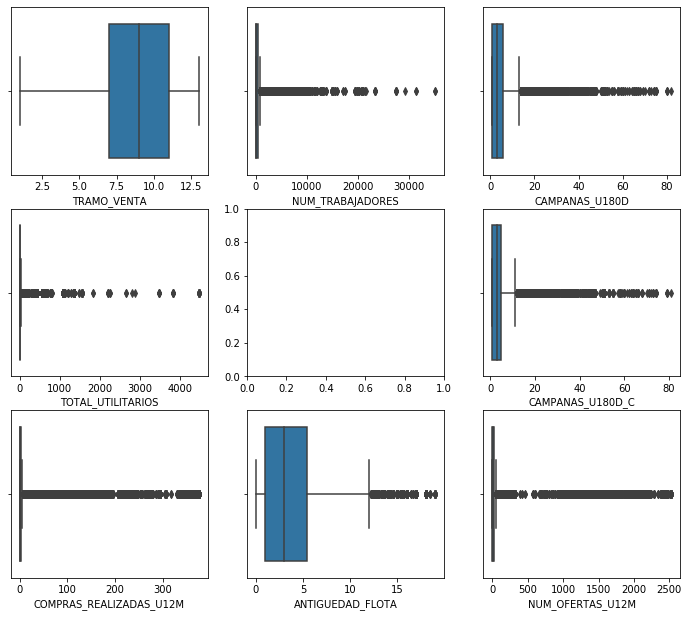

In [11]:
fig, axs = plt.subplots(3,3, figsize = (12,10.5))
plt2 = sns.boxplot(df['TRAMO_VENTA'], ax = axs[0,0])
plt2 = sns.boxplot(df['NUM_TRABAJADORES'], ax = axs[0,1])
plt2 = sns.boxplot(df['TOTAL_UTILITARIOS'], ax = axs[1,0])
plt2 = sns.boxplot(df['ANTIGUEDAD_FLOTA'], ax = axs[2,1])
plt2 = sns.boxplot(df['CAMPANAS_U180D_C'], ax = axs[1,2])
plt2 = sns.boxplot(df['NUM_OFERTAS_U12M'], ax = axs[2,2])
plt2 = sns.boxplot(df['CAMPANAS_U180D'], ax = axs[0,2])
plt2 = sns.boxplot(df['COMPRAS_REALIZADAS_U12M'], ax = axs[2,0])

plt.show()

ahi un exceso de variabilidad en algunas columnas

In [12]:
#estas variables no pueden ser imputadas porque indican que no tienen vehiculos, candidatas a irse de la base!!
df['TOTAL_UTILITARIOS'] = df['TOTAL_UTILITARIOS'].replace(np.nan,0)
df['UTILITARIOS_EXCLUSION'] = df['UTILITARIOS_EXCLUSION'].replace(np.nan,0)
df['RELEVANTE_CAMIONES'] = df['RELEVANTE_CAMIONES'].replace(np.nan,0)
df['RELEVANTE_OTROS'] = df['RELEVANTE_OTROS'].replace(np.nan,0)



df['TRAMO_VENTA'] = df['TRAMO_VENTA'].replace(np.nan, np.mean(df['TRAMO_VENTA']))
df['NUM_TRABAJADORES'] = df['NUM_TRABAJADORES'].replace(np.nan, np.mean(df['NUM_TRABAJADORES']))


### columnas categoricas

In [13]:
df[['MARCA_AGRUPADA','DESC_TIPO_VEHICULO']].describe()

,MARCA_AGRUPADA,DESC_TIPO_VEHICULO
count,192339,188342
unique,8,23
top,MERCEDES-BENZ,CAMION
freq,124753,42771


In [14]:
avr_mar=pd.DataFrame(df.groupby('MARCA_AGRUPADA')["COMPRO_NUM"].mean())
avr_mar=avr_mar.sort_values("COMPRO_NUM",ascending=False)
avr_mar.head(50)

,COMPRO_NUM
MARCA_AGRUPADA,
POWERSYSTEMS,0.247619
GREAT DANE,0.201613
TREMAC,0.118848
HEIL,0.088608
MERCEDES-BENZ,0.086234
FREIGHTLINER,0.059949
MITSUBISHI-FUSO,0.058760
WESTERN STAR,0.047619


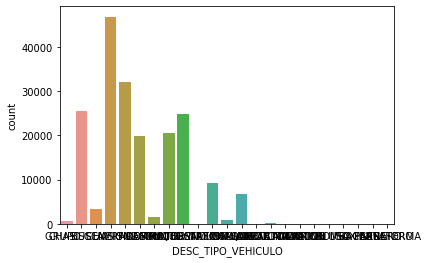

In [15]:
df['DESC_TIPO_VEHICULO'] = df['DESC_TIPO_VEHICULO'].replace(np.nan,'CAMION')
plt1 = sns.countplot(df['DESC_TIPO_VEHICULO'])
plt.show()

In [16]:
df[['FLOTA_NUEVA','ANTIGUEDAD_FLOTA']].describe()

,FLOTA_NUEVA,ANTIGUEDAD_FLOTA
count,103919.000000,103919.000000
mean,0.344884,3.667669
std,0.475333,3.098070
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,3.000000
75%,1.000000,5.437500
max,1.000000,19.000000


In [17]:
# estos valores corresponden a flotas, si estan vacion significa que no tienen flota o bien no tienen flota nueva
df['FLOTA_NUEVA'] = df['FLOTA_NUEVA'].replace(np.nan,0)

#se debe trabajar en esto
df['CAMPANAS_U180D'] = df['CAMPANAS_U180D'].replace(np.nan,0)
df['CAMPANAS_U180D_C'] = df['CAMPANAS_U180D_C'].replace(np.nan,0)
df['ANTIGUEDAD_FLOTA'] = df['ANTIGUEDAD_FLOTA'].replace(np.nan,0)

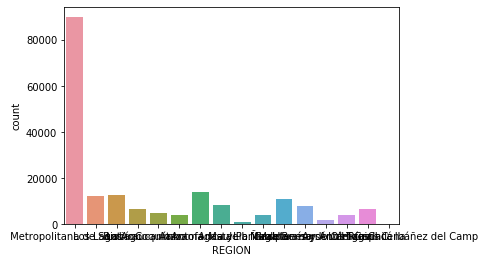

,REGION
count,189565
unique,16
top,Metropolitana de Santiago
freq,89948


In [18]:
plt1 = sns.countplot(df['REGION'])
plt.show(),
df[['REGION']].describe()

In [19]:
df['REGION'] = df['REGION'].replace(np.nan,'NA')

In [20]:
df[['COMUNA_CRM']].describe()

,COMUNA_CRM
count,192122
unique,360
top,SANTIAGO
freq,13173


In [21]:
df['COMUNA_CRM'] = df['COMUNA_CRM'].replace(np.nan,'NA')

In [22]:
df[['DESC_TIPO_VEHICULO']].describe()

,DESC_TIPO_VEHICULO
count,192339
unique,23
top,CAMION
freq,46768


In [23]:
df['DESC_TIPO_VEHICULO'] = df['DESC_TIPO_VEHICULO'].replace(np.nan,'NA')

In [24]:
df[['TIPO_CREDITO_USADO_ANT']].describe()

,TIPO_CREDITO_USADO_ANT
count,97493
unique,7
top,CONTADO
freq,61598


In [25]:
df['TIPO_CREDITO_USADO_ANT'] = df['TIPO_CREDITO_USADO_ANT'].replace(np.nan,'NA')

In [26]:
#cantidad de missing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192339 entries, 15 to 212228
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   RUBRO_ECON                192339 non-null  object 
 1   ANTIGUEDAD_E              192339 non-null  object 
 2   TRAMO_VENTA               192339 non-null  float64
 3   NUM_TRABAJADORES          192339 non-null  float64
 4   TOTAL_UTILITARIOS         192339 non-null  float64
 5   UTILITARIOS_EXCLUSION     192339 non-null  float64
 6   RELEVANTE_BUSES           192339 non-null  float64
 7   RELEVANTE_CAMIONES        192339 non-null  float64
 8   RELEVANTE_RODADOS         192339 non-null  float64
 9   RELEVANTE_VANS            192339 non-null  float64
 10  RELEVANTE_CARGA           192339 non-null  float64
 11  RELEVANTE_PASAJERA        192339 non-null  float64
 12  RELEVANTE_PESADO          192339 non-null  float64
 13  RELEVANTE_CAMIONETA       192339 non-null  

In [27]:
numericas = [['NUM_TRABAJADORES',
'TOTAL_UTILITARIOS',
'UTILITARIOS_EXCLUSION',
'RELEVANTE_BUSES',
'RELEVANTE_CAMIONES',
'RELEVANTE_RODADOS',
'RELEVANTE_VANS',
'RELEVANTE_CARGA',
'RELEVANTE_PASAJERA',
'RELEVANTE_PESADO',
'RELEVANTE_CAMIONETA',
'RELEVANTE_MEDIANO',
'RELEVANTE_OTROS',
'RELEVANTE_LIVIANO',
'RELEVANTE_CAMIONETA_DCAB',
'RELEVANTE_FORESTAL',
'RELEVANTE_CAMABAJA',
'FLOTA_NUEVA',
'ANTIGUEDAD_FLOTA',
'CAMPANAS_U180D',
'CAMPANAS_U180D_C',
'NUM_OFERTAS_U12M',
'COMPRAS_REALIZADAS_U12M',
'CAMPANAS_U180D_C',
'NUM_OFERTAS_U12M',
'COMPRAS_REALIZADAS_U12M']]

df1=df

for i in numericas:
    df1[i]=(df[i]-df1[i].mean())/df1[i].std()

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192339 entries, 15 to 212228
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   RUBRO_ECON                192339 non-null  object 
 1   ANTIGUEDAD_E              192339 non-null  object 
 2   TRAMO_VENTA               192339 non-null  float64
 3   NUM_TRABAJADORES          192339 non-null  float64
 4   TOTAL_UTILITARIOS         192339 non-null  float64
 5   UTILITARIOS_EXCLUSION     192339 non-null  float64
 6   RELEVANTE_BUSES           192339 non-null  float64
 7   RELEVANTE_CAMIONES        192339 non-null  float64
 8   RELEVANTE_RODADOS         192339 non-null  float64
 9   RELEVANTE_VANS            192339 non-null  float64
 10  RELEVANTE_CARGA           192339 non-null  float64
 11  RELEVANTE_PASAJERA        192339 non-null  float64
 12  RELEVANTE_PESADO          192339 non-null  float64
 13  RELEVANTE_CAMIONETA       192339 non-null  

## Exploración
Practicamente todos los grupos tienen una baja conversion pero existen diferencias en promedio

### Análisis por columna

 la variable COMPRO_NUM corresponde a una variable indicadora de si compra o no lo ofertado
#(1) compra (0) no compra

In [29]:
conversion = (sum(df1['COMPRO_NUM'])/len(df1['COMPRO_NUM'].index))*100
conversion

8.362838529887334

Una conversion tan baja requiere balance de la información

#### RUBRO_ECON

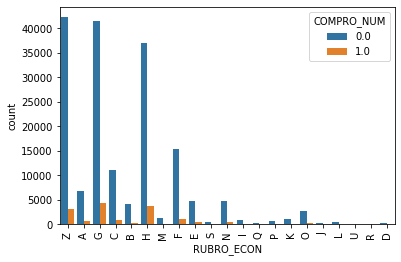

In [30]:
sns.countplot(x = "RUBRO_ECON", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show()

In [31]:
df1.groupby('RUBRO_ECON')["COMPRO_NUM"].mean() 

RUBRO_ECON
A    0.091067
B    0.068701
C    0.071625
D    0.041176
E    0.078802
F    0.070027
G    0.095094
H    0.092615
I    0.059952
J    0.080645
K    0.091922
L    0.098921
M    0.099929
N    0.099849
O    0.088918
P    0.096296
Q    0.047782
R    0.088435
S    0.105769
U    0.051282
Z    0.070162
Name: COMPRO_NUM, dtype: float64

#### ANTIGUEDAD_E

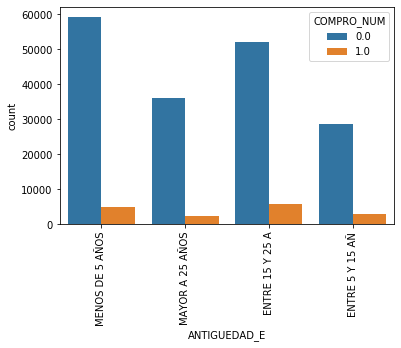

ANTIGUEDAD_E
ENTRE 15 Y 25 A    0.101700
ENTRE 5 Y 15 AÑ    0.090487
MAYOR A 25 AÑOS    0.060186
MENOS DE 5 AÑOS    0.078015
Name: COMPRO_NUM, dtype: float64

In [32]:
# la variable la optimize desde sas
sns.countplot(x = "ANTIGUEDAD_E", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show(),
df1.groupby('ANTIGUEDAD_E')["COMPRO_NUM"].mean() 


#### TRAMO_VENTA

In [33]:
df1.groupby('TRAMO_VENTA')["COMPRO_NUM"].mean() 

TRAMO_VENTA
1.000000     0.084560
2.000000     0.042763
3.000000     0.053214
4.000000     0.054480
5.000000     0.070317
6.000000     0.075308
7.000000     0.078561
8.000000     0.086603
8.869925     0.072378
9.000000     0.093779
10.000000    0.109253
11.000000    0.142973
12.000000    0.103328
13.000000    0.062666
Name: COMPRO_NUM, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

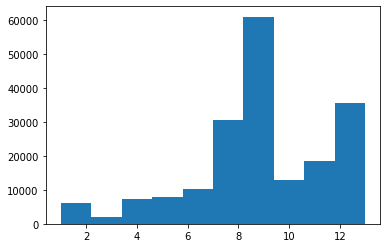

In [34]:
plt.hist(df1["TRAMO_VENTA"])
plt.show

### Numero de trabajadores

<function matplotlib.pyplot.show(*args, **kw)>

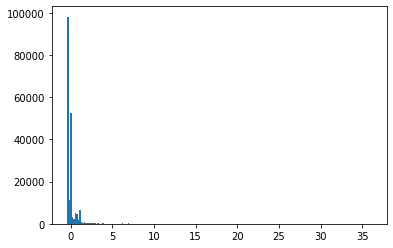

In [35]:
plt.hist(df1["NUM_TRABAJADORES"],bins=200)
plt.show



Existen aoutliers es esta variable

### REGION

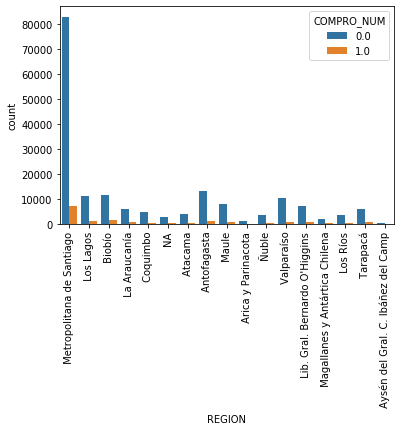

REGION
NA                                     0.066691
 Antofagasta                           0.068725
 Arica y Parinacota                    0.061055
 Atacama                               0.063304
 Aysén del Gral. C. Ibáñez del Camp    0.034161
 Biobío                                0.108378
 Coquimbo                              0.076196
 La Araucanía                          0.117875
 Lib. Gral. Bernardo O'Higgins         0.068511
 Los Lagos                             0.098146
 Los Ríos                              0.117587
 Magallanes y Antártica Chilena        0.097961
 Maule                                 0.099250
 Metropolitana de Santiago             0.078201
 Tarapacá                              0.097575
 Valparaíso                            0.069920
 Ñuble                                 0.103322
Name: COMPRO_NUM, dtype: float64

In [36]:
# la variable la optimize desde sas
sns.countplot(x = "REGION", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show(),
df1.groupby('REGION')["COMPRO_NUM"].mean() 


### Tipo credito usado anteriormente

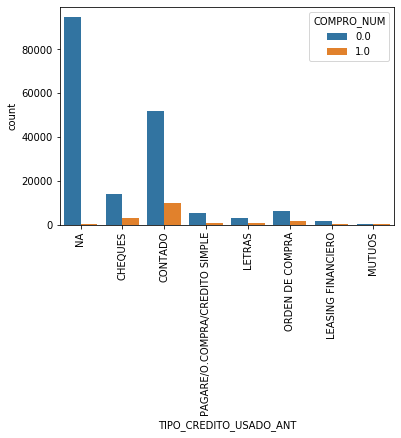

TIPO_CREDITO_USADO_ANT
CHEQUES                           0.177838
CONTADO                           0.160281
LEASING FINANCIERO                0.122730
LETRAS                            0.153651
MUTUOS                            0.155556
NA                                0.002657
ORDEN DE COMPRA                   0.190073
PAGARE/O.COMPRA/CREDITO SIMPLE    0.121955
Name: COMPRO_NUM, dtype: float64

In [37]:
sns.countplot(x = "TIPO_CREDITO_USADO_ANT", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show(),
df1.groupby('TIPO_CREDITO_USADO_ANT')["COMPRO_NUM"].mean() 

Esto tiene poca logica, pero se usa, si el cliente compra antes, tengo el tipo de credito que ocupa, pero voy a agrupar

In [38]:
df1['TIPO_CREDITO_USADO_ANT'] = df1['TIPO_CREDITO_USADO_ANT'].replace('PAGARE/O.COMPRA/CREDITO SIMPLE','CREDITO')
df1['TIPO_CREDITO_USADO_ANT'] = df1['TIPO_CREDITO_USADO_ANT'].replace('LEASING FINANCIERO','LEASING')

### Ofertas realizadas anteriormente

-0.05842219640622282

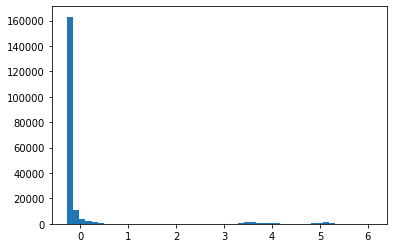

In [39]:
plt.hist(df1["NUM_OFERTAS_U12M"],bins=50)
plt.show

df1['NUM_OFERTAS_U12M'].corr(df1["COMPRO_NUM"])

### Servicios PV

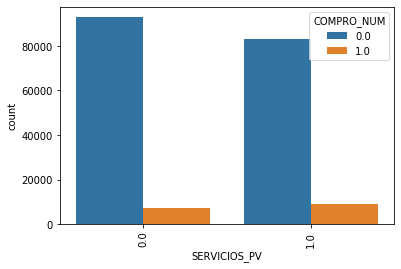

SERVICIOS_PV
0.0    0.071403
1.0    0.096921
Name: COMPRO_NUM, dtype: float64

In [40]:
sns.countplot(x = "SERVICIOS_PV", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show(),
df1.groupby('SERVICIOS_PV')["COMPRO_NUM"].mean() 

## Dummificacion de variables

In [41]:
def variables_dummy(dataset,variable):
    cat_dummies = pd.get_dummies(dataset[variable],prefix=variable)
    #.iloc[:,1:]
    data_new = dataset.join(cat_dummies)
    dataset = data_new.drop([variable],axis=1)
    return dataset

In [42]:
df3=df1

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192339 entries, 15 to 212228
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   RUBRO_ECON                192339 non-null  object 
 1   ANTIGUEDAD_E              192339 non-null  object 
 2   TRAMO_VENTA               192339 non-null  float64
 3   NUM_TRABAJADORES          192339 non-null  float64
 4   TOTAL_UTILITARIOS         192339 non-null  float64
 5   UTILITARIOS_EXCLUSION     192339 non-null  float64
 6   RELEVANTE_BUSES           192339 non-null  float64
 7   RELEVANTE_CAMIONES        192339 non-null  float64
 8   RELEVANTE_RODADOS         192339 non-null  float64
 9   RELEVANTE_VANS            192339 non-null  float64
 10  RELEVANTE_CARGA           192339 non-null  float64
 11  RELEVANTE_PASAJERA        192339 non-null  float64
 12  RELEVANTE_PESADO          192339 non-null  float64
 13  RELEVANTE_CAMIONETA       192339 non-null  

In [43]:
tabla=variables_dummy(df3,"ANTIGUEDAD_E")
tabla=variables_dummy(tabla,"DESC_TIPO_VEHICULO")
tabla=variables_dummy(tabla,"MARCA_AGRUPADA")
tabla=variables_dummy(tabla,"RUBRO_ECON")
tabla=variables_dummy(tabla,"REGION")
#tabla=variables_dummy(tabla,"COMUNA_CRM")
tabla=variables_dummy(tabla,"USADO_NUEVO")
tabla=variables_dummy(tabla,"TIPO_CREDITO_USADO_ANT")

tabla=tabla.drop(["COMUNA_CRM"], axis=1)

In [44]:
y=tabla["COMPRO_NUM"]
x=tabla.drop(["COMPRO_NUM"], axis=1)

# Inicio de modelamiento

### Datos entrenamiento y testeo

como esta desbalanceado, primero divido la muestra pero por estratos

In [45]:
x_res,x_test,y_res,y_test=train_test_split(x,y,test_size=0.2,random_state=1010)

Revisamos como quedan las separaciones

In [46]:
y_res.mean(),y_test.mean(),y_res.shape,y_test.shape

(0.08353750869234619, 0.08399188936258709, (153871,), (38468,))

Tenemos un problema con datos desbalanceados, por lo que revisemos como se comporta este desbalance utilizando un modelo sde random forest como base inicial

In [47]:
modelo_rfc = RandomForestClassifier().fit(x_res, y_res)

In [48]:
#evaluacion del modelo
mediciones(x_res,y_res,x_test,y_test,modelo_rfc)   

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                 33880                  1357
Actual verdadera              2667                   564


,Entrenamiento,Testeo
Accuracy,0.973,0.895
recall,0.747,0.174
roc,0.993,0.820
f1,0.824,0.218


El recall es muy bajo y se ve afectado el f1, es necesario balancear los datos

### Balanceo de datos de entrenamiento

Tengo la opcion de bajar o subir la muestra, a modo de no perder informacion se sube

In [49]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 
nm = SMOTE(random_state = 10101) 
#nm = NearMiss(random_state = 10101)

Using TensorFlow backend.


In [50]:
x_train,y_train=nm.fit_resample(x_res,y_res)

Reviso dimenciones nuevamente

In [51]:
y_res.shape, y_res.mean(), y_train.shape,y_train.mean()

((153871,), 0.08353750869234619, (282034,), 0.5)

paso de 151 mil datos de entrenamiento a 280, mediante resample

# Modelamiento con datos balanceados

La estrategia en este caso es utilizar regresion logistica, en el caso de obtener un pobre ajuste, se utilitan varios modelos para probar

## Regresion logistica como modelo base

Utilizo regresion loistica y una busqueda por gridsearch para encontrar mejores hiperparametros

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


grid={"C":np.logspace(-3,3,3), "penalty":["l2"]}

logreg=LogisticRegression()

logreg_cv=GridSearchCV(logreg,grid,cv=5,scoring='accuracy',verbose=0)

NameError: name 'np' is not defined

In [53]:
logreg_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e+00, 1.e+03]),
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [54]:
logreg_cv.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [57]:
logreg=LogisticRegression(C=1,penalty='l2')
logreg.fit(x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
mediciones(x_train,y_train,x_test,y_test,logreg)   

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                 29359                  5878
Actual verdadera              1525                  1706


,Entrenamiento,Testeo
Accuracy,0.842,0.807
recall,0.851,0.528
roc,0.936,0.824
f1,0.844,0.315


Se aprecia un claro bajo ajuste, veamos si aplicamos otros modelos podemos mejorar esto (al menos el recall y press deben estar sobre 50%)

## Multi-modelos

Para evita probar uno a uno los modelos, se seleccionan varios y luego se verifica los con mejor rendimiento para hacer una busqueda ampliada de los mejores con gridsearch

In [60]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier,StackingClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier          
              

modelos = [["LR","SVC","RF","TREE","MLP","GBOOST","ADABOOST","GRBOOST"],
           [
            LogisticRegression(C=1,penalty='l2'),  
            svm.SVC(max_iter=50),
            RandomForestClassifier(),
            DecisionTreeClassifier(),
            MLPClassifier(),
            GaussianNB(),
            AdaBoostClassifier(),
            GradientBoostingClassifier()]
          ]
warnings.filterwarnings("ignore")

resultados=[]
predicion=[]
error=[]
precision=[]
a=0
for i in modelos[1]:
    ajuste=i.fit(x_train,y_train)
    resultados.append(ajuste)
    predicion.append(ajuste.predict(x_test))
    er = i.score(x_test,y_test)
    error.append(er)
    precision.append(ajuste.score(x_test , y_test))
    print("\n modelo:",modelos[0][a])
    print(mediciones2(x_train,y_train,x_test,y_test,ajuste))
    print("f1 score:",int(f1_score(y_test,ajuste.predict(x_test))*1000)/1000)
    if modelos[0][a]!='SVC':
        print("roc-auc:", roc_auc_score(y_test,ajuste.predict_proba(x_test)[:,1]))
    print(confusion_matrix(y_test,ajuste.predict(x_test)))
    a=a+1


 modelo: LR
          Testeo
Accuracy   0.780
recall     0.622
f1 score: 0.322
roc-auc: 0.8273713698163087
[[28009  7228]
 [ 1220  2011]]

 modelo: SVC
          Testeo
Accuracy   0.681
recall     0.422
f1 score: 0.182
[[24839 10398]
 [ 1865  1366]]

 modelo: RF
          Testeo
Accuracy   0.884
recall     0.275
f1 score: 0.286
roc-auc: 0.8269351276193206
[[33141  2096]
 [ 2341   890]]

 modelo: TREE
          Testeo
Accuracy   0.889
recall     0.313
f1 score: 0.323
roc-auc: 0.651897338890539
[[33215  2022]
 [ 2219  1012]]

 modelo: MLP
          Testeo
Accuracy   0.859
recall     0.371
f1 score: 0.307
roc-auc: 0.8227142374393028
[[31863  3374]
 [ 2030  1201]]

 modelo: GBOOST
          Testeo
Accuracy   0.618
recall     0.936
f1 score: 0.291
roc-auc: 0.7681546261615657
[[20768 14469]
 [  206  3025]]

 modelo: ADABOOST
          Testeo
Accuracy   0.693
recall     0.801
f1 score: 0.305
roc-auc: 0.8217063345223373
[[24091 11146]
 [  641  2590]]

 modelo: GRBOOST
          Testeo
Accurac

Siguiente paso es usar gridsearch para buscar la mejor version de cada uno usando como referencia para los mejores en f1 (arbol de decision, random forest, mlp, adaboost)

## Tree Clasificador Tunning

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(1,8,1)), 
              "min_samples_leaf": list(range(5,18,1))}

tree_cv = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=3,n_jobs=-1,verbose=10).fit(x_train,y_train)


Fitting 3 folds for each of 182 candidates, totalling 546 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

In [66]:
mediciones(x_train,y_train,x_test,y_test,tree_cv)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                 22218                 13019
Actual verdadera               338                  2893


,Entrenamiento,Testeo
Accuracy,0.797,0.652
recall,0.963,0.895
roc,0.867,0.818
f1,0.826,0.302


No mejoro mucho respecto a lo que ya estaba ajustado (claso sobre ajuste)

## Random Forest Tunning

In [67]:
## from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators'      : [25,30,50],
    'max_depth'         : [8,10,15],
    'random_state'      : [0]}

rf_cv = GridSearchCV(RandomForestClassifier(), parameters, cv=3, n_jobs=-1,verbose=10).fit(x_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done  15 out of  27 | elapsed:  1.1min remaining:   54.1s
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:  1.5min remaining:   44.9s
[Parallel(n_jobs=-1)]: Done  21 out of  27 | elapsed:  1.6min remaining:   27.5s
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:  1.8min remaining:   13.5s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.0min finished


In [68]:
rf_cv.best_params_

{'max_depth': 15, 'n_estimators': 50, 'random_state': 0}

In [69]:
mediciones(x_train,y_train,x_test,y_test,rf_cv)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                 26820                  8417
Actual verdadera               892                  2339


,Entrenamiento,Testeo
Accuracy,0.879,0.758
recall,0.982,0.723
roc,0.968,0.844
f1,0.890,0.334


Los modelos que revisare en mayor profundidad son la rn, adaboost y randomforest

## Adaboost con grid search

In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'base_estimator__max_depth':[10,13,15]}

gs = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), params,cv=3,verbose=10,n_jobs=-1)

#print(gs.best_estimator_)

In [71]:
gs.fit(x_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  9.3min remaining: 32.4min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  9.3min remaining: 18.7min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed: 10.7min remaining: 13.4min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed: 10.8min remaining:  8.6min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed: 10.8min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed: 10.9min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 13.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 13.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

In [72]:
gs.best_params_

{'base_estimator__max_depth': 15}

In [73]:
mediciones(x_train,y_train,x_test,y_test,gs)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                 33281                  1956
Actual verdadera              2216                  1015


,Entrenamiento,Testeo
Accuracy,0.983,0.891
recall,0.984,0.314
roc,0.999,0.797
f1,0.983,0.327


Teniendo en cuenta los ajustes actuales es un buen ajuste pero el recall es muy bajo, veamos mas opciones

## Clasificador por Multi-Layer-Perc.  (RN)

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

parameters = {'solver': ['lbfgs'], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[10101]}
mlp_cv = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1,verbose=10,cv=3,scoring='f1')


In [75]:
mlp_cv.fit(x_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 27.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.

In [76]:
mlp_cv.best_params_

{'alpha': 1e-09,
 'hidden_layer_sizes': 12,
 'random_state': 10101,
 'solver': 'lbfgs'}

In [77]:
mediciones(x_train,y_train,x_test,y_test,mlp_cv)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                 29569                  5668
Actual verdadera              1535                  1696


,Entrenamiento,Testeo
Accuracy,0.849,0.812
recall,0.857,0.524
roc,0.941,0.826
f1,0.850,0.320


Mejora el recall pero caemos en el accuracy, igualmente roc esta muy bueno

Ya tengo la mejor version de estos 3 modelos, antes de escojer uno de ellos ¿juntemoslos todos y veamos si la union de todos es mejor que uno solo?

In [93]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

modelos =[('ada',AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20))),
('mlp',MLPClassifier(alpha=0.1,hidden_layer_sizes=14,random_state= 10101,solver='lbfgs')),
('rfc',RandomForestClassifier(max_depth=15,n_estimators=50,random_state=0))]

modelo_salida = LogisticRegression(C= 1000, penalty= 'l2')

#voy a forzarlo a usar las variables predictoras con las predichas
stack=StackingClassifier(estimators=modelos, final_estimator=modelo_salida,n_jobs=1,passthrough=True,verbose=10)

stack.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 11.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 14.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 18.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 18.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elap

StackingClassifier(cv=None,
                   estimators=[('ada',
                                AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                         class_weight=None,
                                                                                         criterion='gini',
                                                                                         max_depth=20,
                                                                                         max_features=None,
                                                                                         max_leaf_nodes=None,
                                                                                         min_impurity_decrease=0.0,
                                                                                         min_impurity_spl

In [94]:
mediciones(x_train,y_train,x_test,y_test,stack)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                 16598                  1030
Actual verdadera              1065                   541


,Entrenamiento,Testeo
Accuracy,0.976,0.891
recall,0.982,0.336
roc,0.998,0.851
f1,0.976,0.340


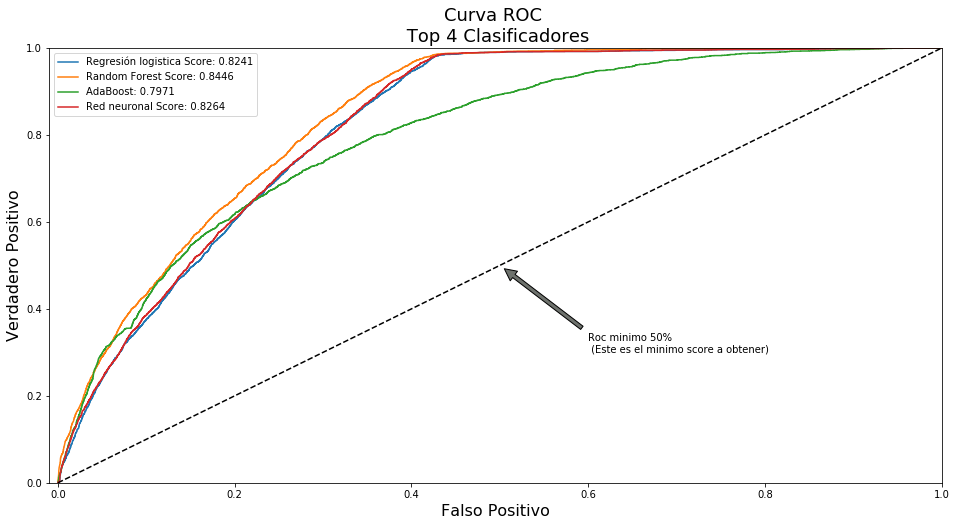

In [78]:
log_reg_pred = logreg_cv.predict_proba(x_test)[:,1]
rf_pred = rf_cv.predict_proba(x_test)[:,1]
ada_pred = gs.predict_proba(x_test)[:,1]
rn_pred = mlp_cv.predict_proba(x_test)[:,1]

log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, rf_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, ada_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test,rn_pred)


plt.figure(figsize=(16,8))
plt.title('Curva ROC \n Top 4 Clasificadores', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Regresión logistica Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred)))
plt.plot(knear_fpr, knear_tpr, label='Random Forest Score: {:.4f}'.format(roc_auc_score(y_test, rf_pred)))
plt.plot(svc_fpr, svc_tpr, label='AdaBoost: {:.4f}'.format(roc_auc_score(y_test, ada_pred)))
plt.plot(tree_fpr, tree_tpr, label='Red neuronal Score: {:.4f}'.format(roc_auc_score(y_test, rn_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('Falso Positivo', fontsize=16)
plt.ylabel('Verdadero Positivo', fontsize=16)
plt.annotate('Roc minimo 50% \n (Este es el minimo score a obtener)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()
    
plt.show()

# Conclusión

En todos los modelos balaneados es posible apreciar un sobre ajuste de los valores, sin embargo es importante indicar que para el problema en cuestion es prioritario no desechar lead buenos e intentar desechar lead malos. por este motivo busco el mejor equilibrio entre recall y accuracy, evitando descuidar el presicion.

Tal contexto lleva a dejar al modelo RF con el mejor comportamiento.

Confusion matrix Random Forest:
 [[26820  8417]
 [  892  2339]]


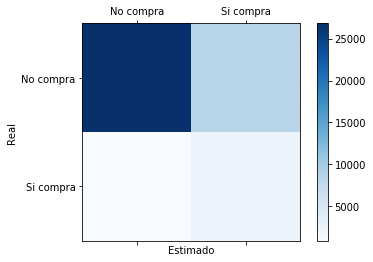

In [79]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=rf_cv.predict(x_test))
print('Confusion matrix Random Forest:\n', conf_mat)

labels = ['No compra', 'Si compra']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Estimado')
plt.ylabel('Real')
plt.show()

# Exportación del modelo

In [80]:
import pickle

filename = 'lead_score_utilitario_empresa_modelo.sav'

pickle.dump(rf_cv, open(filename, 'wb'))